## **Imports**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

## **Data**

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.14MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 64.0kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.26MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.17MB/s]


## **Sample Image**

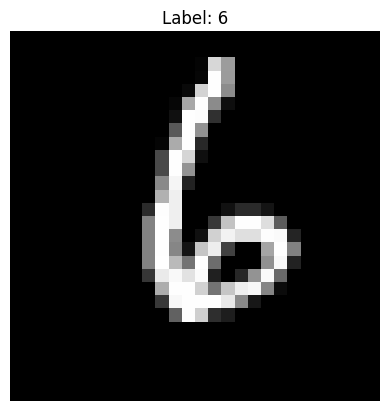

In [ ]:
for images, labels in trainloader:
    break

plt.imshow(images[0].squeeze(), cmap='gray')
plt.axis('off')
plt.title(f"Label: {labels[0].item()}")
plt.show()

## **Define the CNN Model**

We define a convolutional neural network (CNN) with two convolution layers followed by dense layers. This model will classify digits.

In [ ]:
class DigitCNN(nn.Module):
    def __init__(self):
        super(DigitCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


## **Train the Model**

We create the model, define the optimizer and loss function, and train the model using the training data.

In [ ]:
# Make sure you're using GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define model
model = DigitCNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# Training loop
epochs = 10  # increase from 5 to 10
model.train()
for epoch in range(epochs):
    total_loss = 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")



Using device: cuda
Epoch 1, Loss: 149.0714
Epoch 2, Loss: 40.1602
Epoch 3, Loss: 25.5454
Epoch 4, Loss: 17.4755
Epoch 5, Loss: 13.1365
Epoch 6, Loss: 10.2302
Epoch 7, Loss: 7.5463
Epoch 8, Loss: 5.9464
Epoch 9, Loss: 5.1640
Epoch 10, Loss: 5.6017


## **Save the Trained Model**

In [ ]:
# Save trained model to a file
torch.save(model.state_dict(), "digit_model.pth")
print("✅ Model saved as digit_model.pth")


✅ Model saved as digit_model.pth


Download from Google colab

In [ ]:
from google.colab import files
files.download("digit_model.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Bonus Task:**
Link the model to an interactive streamlit app :)